## Importing Packages

In [ ]:
#Mount Drive

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
#Read in Dataset
df = pd.read_csv('/content/drive/My Drive/OASIS-hippocampus.csv')

In [ ]:
df.head()

,Unnamed: 0,ID,M.F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,RightHippoVol,LeftHippoVol,TrainData,Dementia
0,1,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,4230,3807,0,0
1,2,OAS1_0003_MR1,F,R,73,4,3.0,27,0.5,1454,0.708,1.207,NaN,2896,2801,1,1
2,7,OAS1_0010_MR1,M,R,74,5,2.0,30,0.0,1636,0.689,1.073,NaN,2832,2578,0,0
3,8,OAS1_0011_MR1,F,R,52,3,2.0,30,0.0,1321,0.827,1.329,NaN,3978,4080,0,0
4,10,OAS1_0013_MR1,F,R,81,5,2.0,30,0.0,1664,0.679,1.055,NaN,3557,3495,0,0


## Data Visualization

<Axes: xlabel='RightHippoVol', ylabel='LeftHippoVol'>

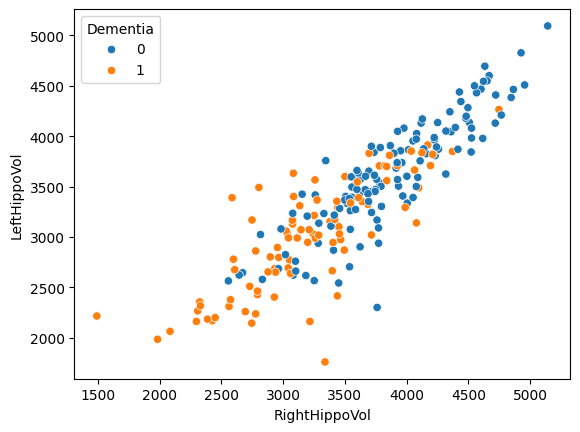

In [ ]:
#Scatterplot
sns.scatterplot(x=df["RightHippoVol"],y=df["LeftHippoVol"], hue = df["Dementia"])


<Axes: xlabel='LeftHippoVol', ylabel='Density'>

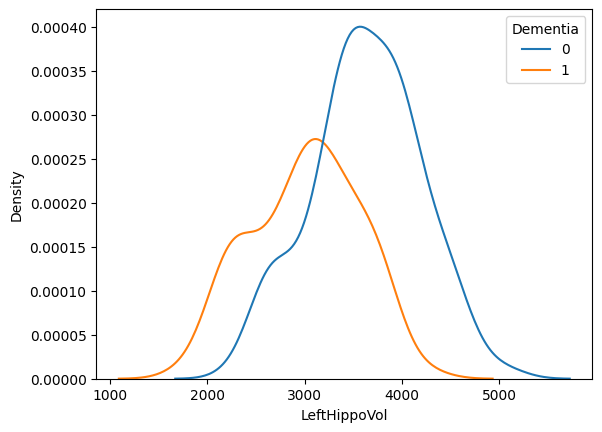

In [ ]:
#Density Plot for LeftHippoVol
sns.kdeplot(x=df["LeftHippoVol"],hue=df["Dementia"])

<Axes: xlabel='RightHippoVol', ylabel='Density'>

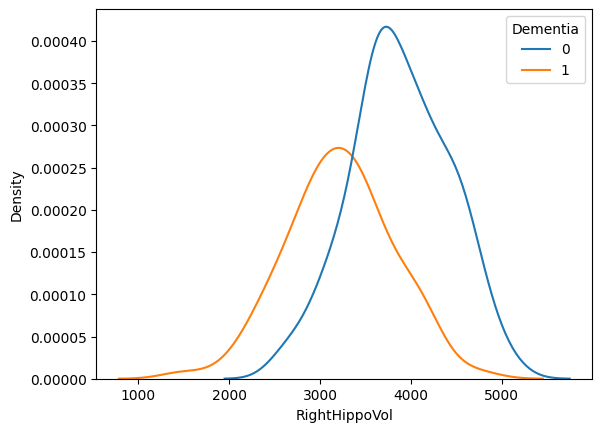

In [ ]:
#Density Plot for RightHippoVol
sns.kdeplot(x=df["RightHippoVol"],hue=df["Dementia"])

Text(0.5, 0, 'Dementia')

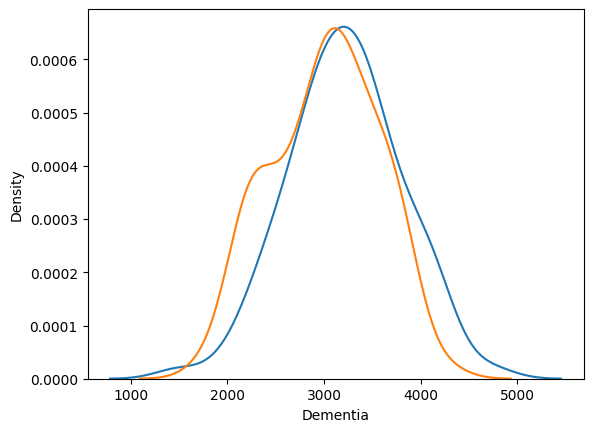

In [ ]:
#Plot by Dementia

temp1 = df[df["Dementia"]>0]["RightHippoVol"]
temp2 = df[df["Dementia"]>0]["LeftHippoVol"]

plot = sns.kdeplot(x=temp1)
sns.kdeplot(x=temp2)

plot.set_xlabel( "Dementia")

Text(0.5, 0, 'Healthy')

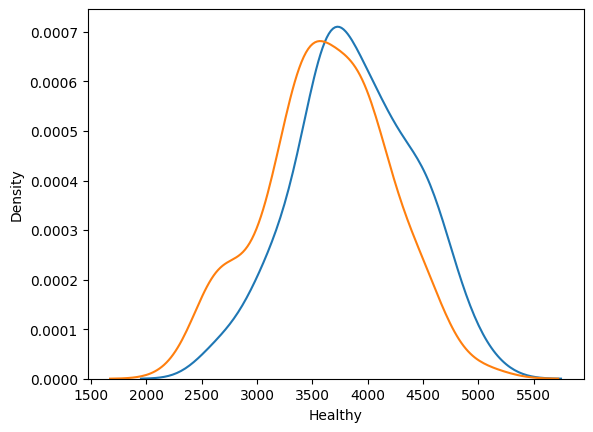

In [ ]:
#Plot by Healthy

temp1 = df[df["Dementia"]==0]["RightHippoVol"]
temp2 = df[df["Dementia"]==0]["LeftHippoVol"]

plot = sns.kdeplot(x=temp1)
sns.kdeplot(x=temp2)

plot.set_xlabel( "Healthy")

## Training

In [ ]:
#Training Data
df_train = df[df["TrainData"]>0]

#Testing Data
df_test = df[df["TrainData"]==0]

In [ ]:
#Training

#Calculates Prior Probability
numDementia = df_train["Dementia"].value_counts()[1]
probDementia = numDementia/(len(df_train))
probHealthy = 1-probDementia

#Calculate STD and Mean Values For Dementia Patients
rightHippoMeanDementia = df_train[df_train["Dementia"]>0]["RightHippoVol"].mean()
rightHippoSTDDementia = df_train[df_train["Dementia"]>0]["RightHippoVol"].std()

leftHippoMeanDementia = df_train[df_train["Dementia"]>0]["LeftHippoVol"].mean()
leftHippoSTDDementia = df_train[df_train["Dementia"]>0]["LeftHippoVol"].std()

#Calculate STD and Mean Values For Healthy Patients
rightHippoMeanHealthy = df_train[df_train["Dementia"]==0]["RightHippoVol"].mean()
rightHippoSTDHealthy= df_train[df_train["Dementia"]==0]["RightHippoVol"].std()

leftHippoMeanHealthy = df_train[df_train["Dementia"]==0]["LeftHippoVol"].mean()
leftHippoSTDHealthy = df_train[df_train["Dementia"]==0]["LeftHippoVol"].std()


In [ ]:
#Gaussian PDF Function
def gPDF(x , mean , sdv):
    gPDF = (np.pi*sdv) * np.exp(-0.5*((x-mean)/sdv)**2)
    return gPDF

## Testing

In [ ]:
#Testing
predictions = pd.DataFrame(columns=['predictedValues'])

count = 0

for index, row in df_test.iterrows():
  #Gets data from each patient
  rightHippoData = row["RightHippoVol"]
  leftHippoData = row["LeftHippoVol"]

  #Computes GaussianPDF for Dementia Class
  rightGaussianPDFDem = gPDF(rightHippoData,rightHippoMeanDementia,rightHippoSTDDementia)
  leftGaussianPDFDem = gPDF(leftHippoData,leftHippoMeanDementia,leftHippoSTDDementia)

  #Computes Dementia Class Prob
  demClassProb = leftGaussianPDFDem*rightGaussianPDFDem*0.5

  #Computes GaussianPDF for Healthy Class
  rightGaussianPDFHealthy = gPDF(rightHippoData,rightHippoMeanHealthy,rightHippoSTDHealthy)
  leftGaussianPDFHealthy = gPDF(leftHippoData,leftHippoMeanHealthy,leftHippoSTDHealthy)

  #Computes Healthy Class Prob
  healthyClassProb = rightGaussianPDFHealthy*leftGaussianPDFHealthy*0.5

  if (demClassProb>healthyClassProb):
    predictions.loc[count] = 1
  else:
    predictions.loc[count] = 0

  count+=1


In [ ]:
#Computes Final Accuracy
countCorrect = 0
dementiaCol = df_test["Dementia"].to_numpy()

predictions = predictions.values

for x in range(len(predictions)):
  if(predictions[x]==dementiaCol[x]):
    countCorrect+=1

finalAccuracy = countCorrect/len(predictions)

finalAccuracy

0.7256637168141593